# 朴素贝叶斯分类器

In [1]:
import numpy as np
from collections import Counter

In [2]:
# 天气  季节
X = np.array([['晴', '春'],
              ['雨', '春'],
              ['晴', '春'],
              ['晴', '夏'],
              ['雨', '夏'],
              ['阴', '冬'],
              ['阴', '夏'],
              ['雨', '夏'],
              ['晴', '冬'],
              ['晴', '夏'],
              ['阴', '秋'],
              ['晴', '秋'],
              ['雨', '秋']])
y = np.array(['兔', '鸭', '鸡', '鸡', '鸭', '鸡', '兔', '鸭', '鸡', '鸡', '兔', '鸡', '鸭'])

In [3]:
# P(yk/x) = P(yk)P(x1/yk)P(x2/yk)P(x3/yk)......P(xn/yk)

In [4]:
label_counter = Counter(y)
label_counter

Counter({'兔': 3, '鸭': 4, '鸡': 6})

In [5]:
label_dict = {}
for i in label_counter.keys():
    label_dict[i] = label_counter[i] / len(y)
label_dict

{'兔': 0.23076923076923078, '鸭': 0.3076923076923077, '鸡': 0.46153846153846156}

In [6]:
features = {}
for i in range(X.shape[1]):
    features[i] = np.unique(X[:,i])
features

{0: array(['晴', '阴', '雨'], dtype='<U1'),
 1: array(['冬', '夏', '春', '秋'], dtype='<U1')}

In [7]:
X_temp = X[y=='鸡']
X_temp

array([['晴', '春'],
       ['晴', '夏'],
       ['阴', '冬'],
       ['晴', '冬'],
       ['晴', '夏'],
       ['晴', '秋']], dtype='<U1')

In [8]:
feature_counter = Counter(X_temp[:, 0])
feature_counter

Counter({'晴': 5, '阴': 1})

In [9]:
features[0]

array(['晴', '阴', '雨'], dtype='<U1')

In [10]:
temp = {}
for item in features[0]:
    count  = feature_counter[item] if item in feature_counter else 0
    temp[item] = count / len(X_temp)
temp

{'晴': 0.8333333333333334, '阴': 0.16666666666666666, '雨': 0.0}

In [21]:
def calc(X):
    res = {}
    for i in range(X.shape[1]):
        feature_counter = Counter(X[:, i])
        
        temp = {}
        for item in features[i]:
            count  = feature_counter[item] if item in feature_counter else 0
            temp[item] = count / len(X)
        res[i] = temp
    return res

In [22]:
calc(X_temp)

{0: {'晴': 0.8333333333333334, '阴': 0.16666666666666666, '雨': 0.0},
 1: {'冬': 0.3333333333333333,
  '夏': 0.3333333333333333,
  '春': 0.16666666666666666,
  '秋': 0.16666666666666666}}

In [23]:
calc(X[y == '兔'])

{0: {'晴': 0.3333333333333333, '阴': 0.6666666666666666, '雨': 0.0},
 1: {'冬': 0.0,
  '夏': 0.3333333333333333,
  '春': 0.3333333333333333,
  '秋': 0.3333333333333333}}

In [28]:
features_dict = {}
for i in label_dict.keys():
    features_dict[i] = calc(X[y == i])
features_dict

{'兔': {0: {'晴': 0.3333333333333333, '阴': 0.6666666666666666, '雨': 0.0},
  1: {'冬': 0.0,
   '夏': 0.3333333333333333,
   '春': 0.3333333333333333,
   '秋': 0.3333333333333333}},
 '鸭': {0: {'晴': 0.0, '阴': 0.0, '雨': 1.0},
  1: {'冬': 0.0, '夏': 0.5, '春': 0.25, '秋': 0.25}},
 '鸡': {0: {'晴': 0.8333333333333334, '阴': 0.16666666666666666, '雨': 0.0},
  1: {'冬': 0.3333333333333333,
   '夏': 0.3333333333333333,
   '春': 0.16666666666666666,
   '秋': 0.16666666666666666}}}

### P(yk/x) = P(yk)P(x1/yk)P(x2/yk)P(x3/yk)......P(xn/yk)

In [29]:
x = np.array(['晴', '秋'])

In [30]:
# 鸡
label_dict['鸡']  * features_dict['鸡'][0]['晴'] * features_dict['鸡'][1]['秋']

0.0641025641025641

In [31]:
# 鸭
label_dict['鸭']  * features_dict['鸭'][0]['晴'] * features_dict['鸭'][1]['秋']

0.0

In [32]:
# 兔
label_dict['兔']  * features_dict['兔'][0]['晴'] * features_dict['兔'][1]['秋']

0.02564102564102564

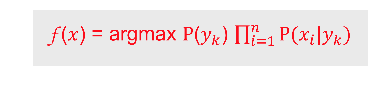

In [34]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片

image = mpimg.imread('suanfa.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
image.shape #(512, 512, 3)

plt.imshow(image) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

根据上面的算法，选择结果最大的就是可能性最大的。所以预测结果为 鸡